In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [21]:
def plot_Solutions(PredictsList,Mean,TS,MeanRMSE,RMSE):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/predicions.png")
    del fig
    gc.collect()

In [3]:
predictions = pd.read_csv("Results/iteraciones/predicions.csv" )

In [4]:
predictions = predictions[predictions['Param1']>1]

In [5]:
predictions = predictions.reset_index(drop = True)

In [10]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [11]:
params = ['Param1','Param2','Param3','Param4']

In [12]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [13]:
TS = get_TS()

In [18]:
meanPred = np.mean(predictions[preds])
RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))
predRMSE = np.sqrt(np.mean(predictions['MSE']))

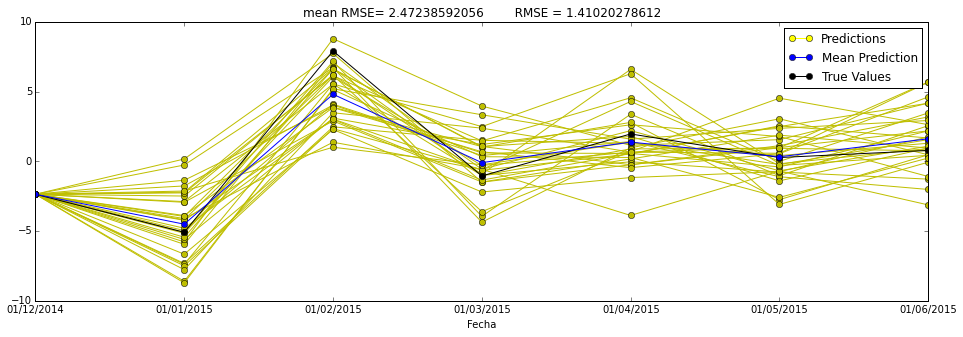

In [22]:
plot_Solutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,predRMSE,RMSE)

In [6]:
predMSE = np.mean(predictions['MSE'])
print predMSE

6.1126921402


In [7]:
predParam1 = predictions.groupby('Param1')

In [23]:
predParam1.count()

,Param2,Param3,Param4,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE
Param1,,,,,,,,,,
12,11,11,11,11,11,11,11,11,11,11
13,19,19,19,19,19,19,19,19,19,19


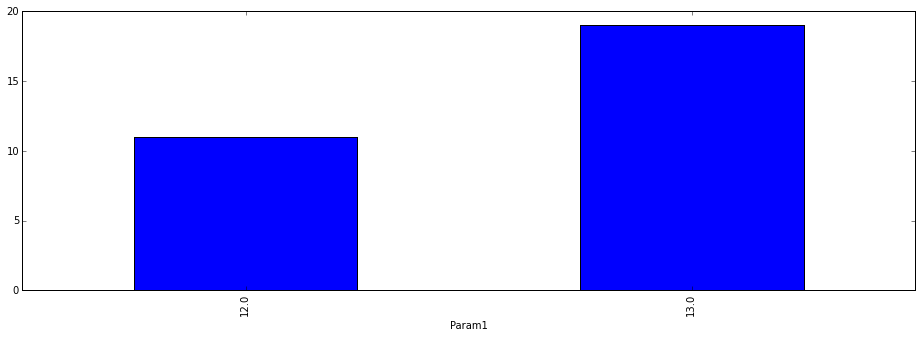

In [29]:
(predParam1['Param2'].count()).plot(kind='bar')

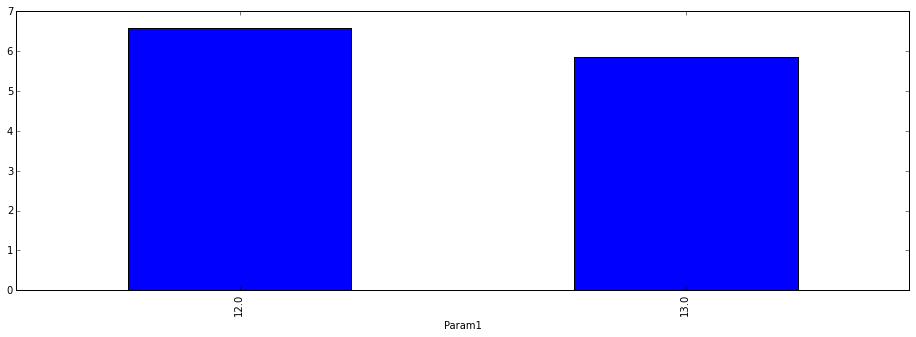

In [30]:
predParam1['MSE'].mean().plot(kind="bar")

In [51]:
predParam1_2 = predictions.groupby(['Param1','Param2'])

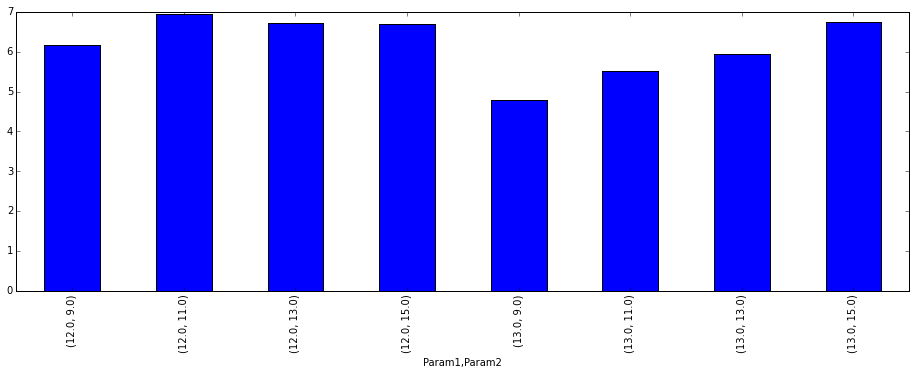

In [61]:
predParam1_2['MSE'].mean().plot(kind='bar')

In [70]:
predictions.groupby('Param3').count()

,Param1,Param2,Param4,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE
Param3,,,,,,,,,,
0.10,12,12,12,12,12,12,12,12,12,12
0.15,9,9,9,9,9,9,9,9,9,9
0.20,7,7,7,7,7,7,7,7,7,7
0.25,1,1,1,1,1,1,1,1,1,1
0.30,1,1,1,1,1,1,1,1,1,1


In [96]:
predictions.groupby('Param3')['MSE'].mean()

Param3
0.10    6.056445
0.15    6.283787
0.20    6.533431
0.25    3.188319
0.30    5.227012
Name: MSE, dtype: float64